predict uber prices from pickup point to agreed drop off
1. preprocess
2. identify outliers
3. check correlation 
4. implement linear regrssion & random forest regression models
5. Evaluate model & compare R2 score, RMSE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score, r2_score, root_mean_squared_error 

In [2]:
data=pd.read_csv("uber.csv")
data

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [4]:
#PREPROCESSING
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [5]:
data.dropna(inplace= True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         199999 non-null  int64  
 1   key                199999 non-null  object 
 2   fare_amount        199999 non-null  float64
 3   pickup_datetime    199999 non-null  object 
 4   pickup_longitude   199999 non-null  float64
 5   pickup_latitude    199999 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 15.3+ MB


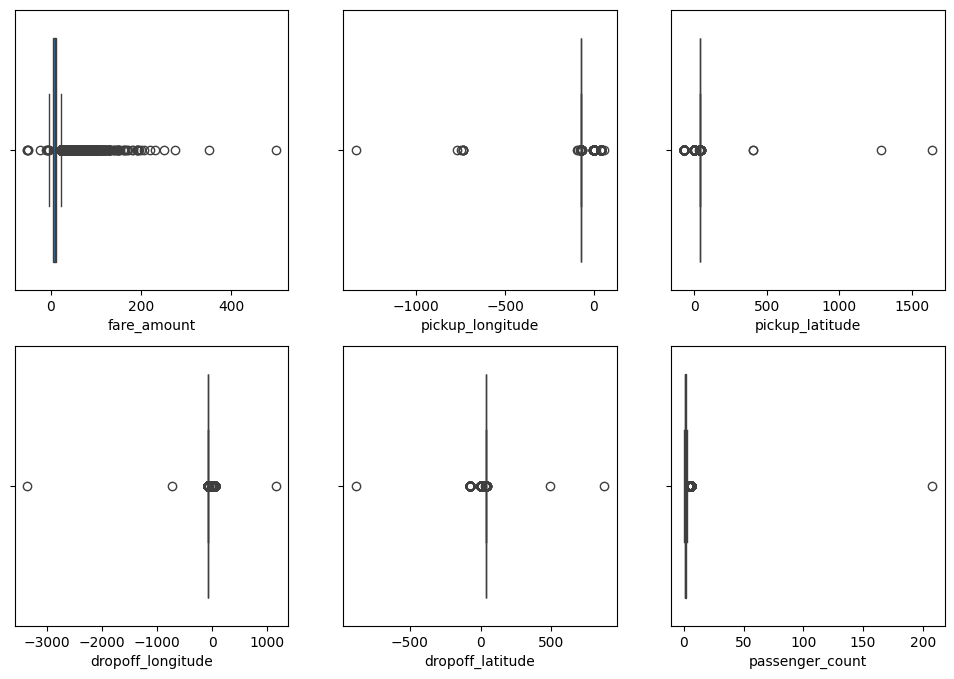

In [7]:
#TO REMOVE OUTLIERS
numeric_col = ['fare_amount','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count']
plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_col,1): #for two var in foir loop we use enumerate
    plt.subplot(2,3,i)
    sns.boxplot(x=data[col])
plt.tight_layout
plt.show()


In [8]:
z_score=np.abs(stats.zscore(data[numeric_col]))
threshold=3
outlier=np.where(z_score>threshold)
print(z_score)

        fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0          0.389820          0.128712         0.103940           0.112387   
1          0.369621          0.128235         0.102628           0.112021   
2          0.155539          0.129169         0.104253           0.109570   
3          0.612003          0.126641         0.110739           0.109780   
4          0.468616          0.122173         0.104682           0.110372   
...             ...               ...              ...                ...   
199995     0.844286          0.127596         0.104071           0.111397   
199996     0.389820          0.127393         0.103744           0.112933   
199997     1.973402          0.127506         0.106289           0.101672   
199998     0.317127          0.128477         0.102269           0.111144   
199999     0.276730          0.127364         0.101573           0.111319   

        dropoff_latitude  passenger_count  
0               0.117638       

In [9]:
#Removing outliers
data=data.drop(data.index[outlier[0]])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186540 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         186540 non-null  int64  
 1   key                186540 non-null  object 
 2   fare_amount        186540 non-null  float64
 3   pickup_datetime    186540 non-null  object 
 4   pickup_longitude   186540 non-null  float64
 5   pickup_latitude    186540 non-null  float64
 6   dropoff_longitude  186540 non-null  float64
 7   dropoff_latitude   186540 non-null  float64
 8   passenger_count    186540 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 14.2+ MB


<Axes: >

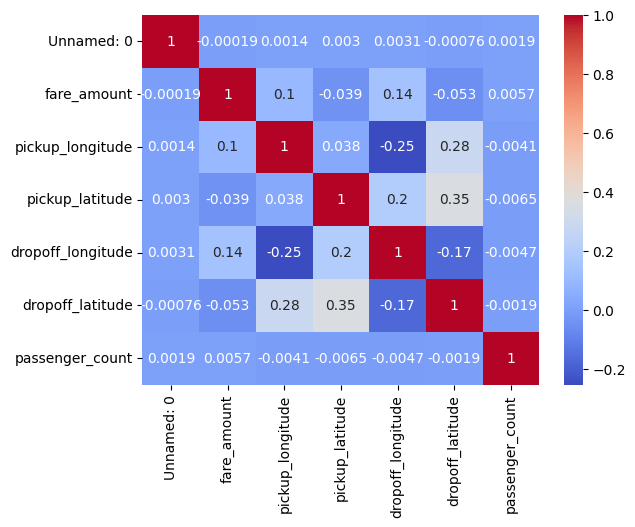

In [11]:
#CHECKING CORRELATION

data=data.drop(columns=['pickup_datetime','key'], axis=1)
cm = data.corr()
#plt.figure(figsize=10,8)
sns.heatmap(cm, annot =True, cmap="coolwarm")

In [12]:
#IMPLEMENT KINEAR REGRESSION

x = data.drop('fare_amount', axis=1)
y = data['fare_amount']

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2,random_state=42)
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)


LinearRegression()

In [13]:
y_pred_lr= lin_reg.predict(x_test)

In [14]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(x_train,y_train)
y_pred_rf=rf_reg.predict(x_test)

In [15]:
#COMPARISONS OF ACC SCORE, RMSE, R2 SCORE

#Linear regression model
r2_lr = r2_score(y_test,y_pred_lr)
print("For Linear Regression Model: ")
print("R2_Score = ",r2_lr)
rmse_lr= root_mean_squared_error(y_test,y_pred_lr)
print("RMSE = ",rmse_lr)

#Random forest model
r2_rf = r2_score(y_test, y_pred_rf)
print("\nFor Random Forest Model: ")
print("R2_Score = ",r2_rf)
rmse_rf= root_mean_squared_error(y_test,y_pred_rf)
print("RMSE = ",rmse_rf)

For Linear Regression Model: 
R2_Score =  0.06403843012837818
RMSE =  6.2413367960319865

For Random Forest Model: 
R2_Score =  0.8136254928222085
RMSE =  2.7851068672465256
